<a href="https://colab.research.google.com/github/BonnieChester/GSM-KU-Workshop/blob/main/WS_data_analysis_non_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# 读取数据
file_path = '/content/drive/My Drive/WS/Summary by 6 facets_for analysis.xlsx'  # 修改为你的文件路径
data = pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# 特征数据是 X，因变量是 y，X 是一个包含六个特征的特征矩阵，y 是目标变量
X_1 = data[['Intrapersonal', 'Artistic', 'Interactive', 'Intrinsic', 'Interpersonal', 'Mechanical']]
X_2 = data[['Intrapersonal1', 'Artistic1', 'Interactive1', 'Intrinsic1', 'Interpersonal1', 'Mechanical1']]
X_3 = data[['Intrapersonal2', 'Artistic2', 'Interactive2', 'Intrinsic2', 'Interpersonal2', 'Mechanical2']]

y = data['Positive rate']

# 创建一个包含多项式特征的管道
def Model(X):
    degree = 4  # 多项式的次数，可以根据需要进行调整
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    return model

# 拟合模型
model1 = Model(X_1)
model2 = Model(X_2)
model3 = Model(X_3)

# 预测
y_pred1 = model1.predict(X_1)
y_pred2 = model2.predict(X_2)
y_pred3 = model3.predict(X_3)

print("Coefficients:", model1.named_steps['linearregression'].coef_)
print("Intercept:", model1.named_steps['linearregression'].intercept_)
print("Coefficients:", model2.named_steps['linearregression'].coef_)
print("Intercept:", model2.named_steps['linearregression'].intercept_)
print("Coefficients:", model3.named_steps['linearregression'].coef_)
print("Intercept:", model3.named_steps['linearregression'].intercept_)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1, X_1, y, cv=5)  # 5 折交叉验证
print("Cross-validation scores:", scores)
scores = cross_val_score(model2, X_2, y, cv=5)  # 5 折交叉验证
print("Cross-validation scores:", scores)
scores = cross_val_score(model3, X_3, y, cv=5)  # 5 折交叉验证
print("Cross-validation scores:", scores)

from sklearn.metrics import mean_squared_error, r2_score

mse1 = mean_squared_error(y, y_pred1)
r2_1 = r2_score(y, y_pred1)

print("Mean Squared Error (MSE):", mse1)
print("R-squared (R²) score:", r2_1)

mse2 = mean_squared_error(y, y_pred2)
r2_2 = r2_score(y, y_pred2)

print("Mean Squared Error (MSE):", mse2)
print("R-squared (R²) score:", r2_2)

mse3 = mean_squared_error(y, y_pred3)
r2_3 = r2_score(y, y_pred3)

print("Mean Squared Error (MSE):", mse3)
print("R-squared (R²) score:", r2_3)

Coefficients: [-8.84279992e+07 -2.70806712e+09 -2.80391215e+09  1.05788332e+09
 -9.87207170e+08  2.80755285e+09  3.83599761e+09  3.40214735e+08
 -6.71590648e+09  2.51875367e+09  1.90373817e+09 -8.05635435e+09
  1.82334572e+10  1.13225851e+09  2.37641975e+09  1.32695889e+09
 -1.07053120e+09  1.09221910e+10 -4.13937430e+09  9.83807555e+09
  2.84758387e+09 -1.25832908e+10 -1.10535018e+10  6.86673764e+09
  4.90327318e+09 -2.31793476e+09 -4.43173162e+09 -1.46082972e+10
  1.48478617e+10  3.76609855e+09 -1.35735801e+10 -1.15287356e+10
 -9.38163532e+09 -1.56993278e+10  6.06832994e+08  1.73280796e+09
 -1.74660136e+09  2.21269022e+10 -1.58294139e+10  2.94345773e+09
  1.19516152e+10  1.09704132e+10 -6.56580498e+09  7.67528263e+08
  1.44098899e+10 -8.38198289e+09 -3.67640668e+09 -1.99832387e+09
  1.19746338e+10 -1.04303036e+10  8.26378603e+09  1.08675240e+10
  8.74952152e+08  8.01152456e+09 -4.60889437e+09 -6.54267015e+09
 -1.87394589e+09 -7.54414672e+09 -1.19909089e+09 -4.90566527e+09
 -6.8569676

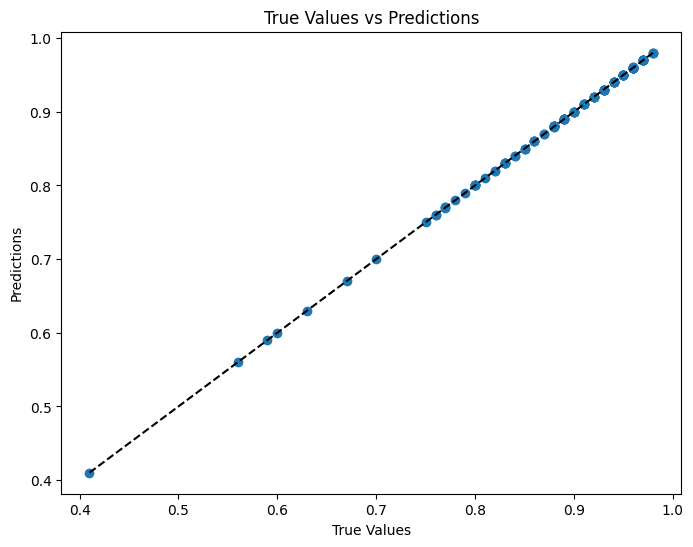

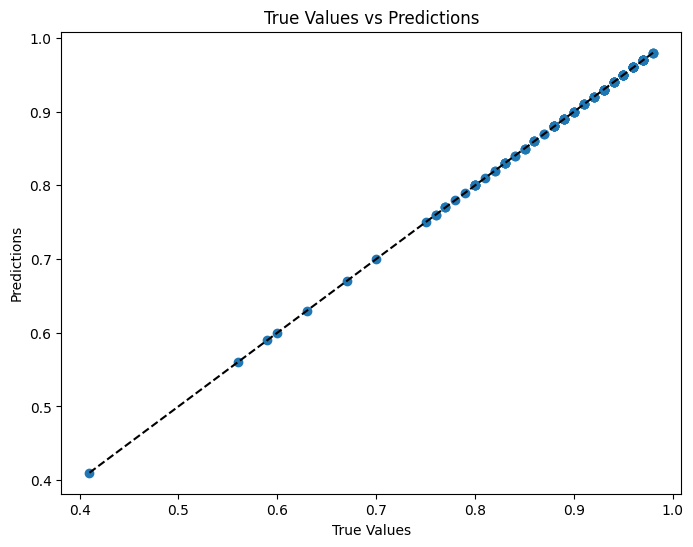

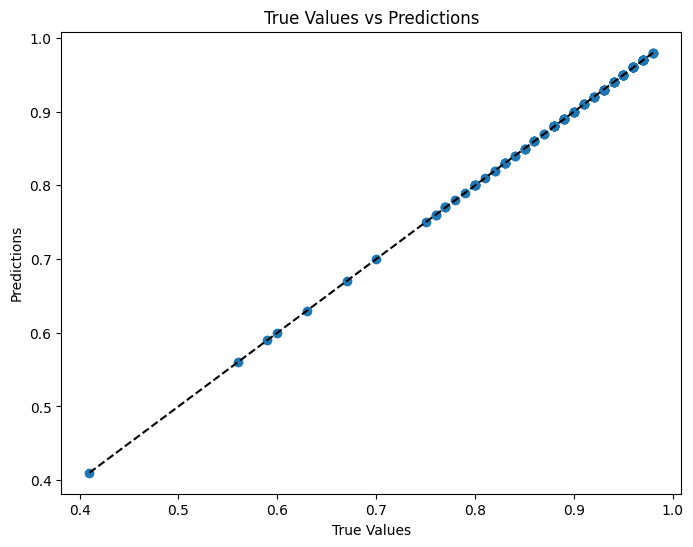

In [ ]:
import matplotlib.pyplot as plt

# 假设 predictions 是模型的预测结果，而 true_values 是真实值
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred1)
plt.plot([min(y), max(y)], [min(y), max(y)], '--k')  # 对角线
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred2)
plt.plot([min(y), max(y)], [min(y), max(y)], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred3)
plt.plot([min(y), max(y)], [min(y), max(y)], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

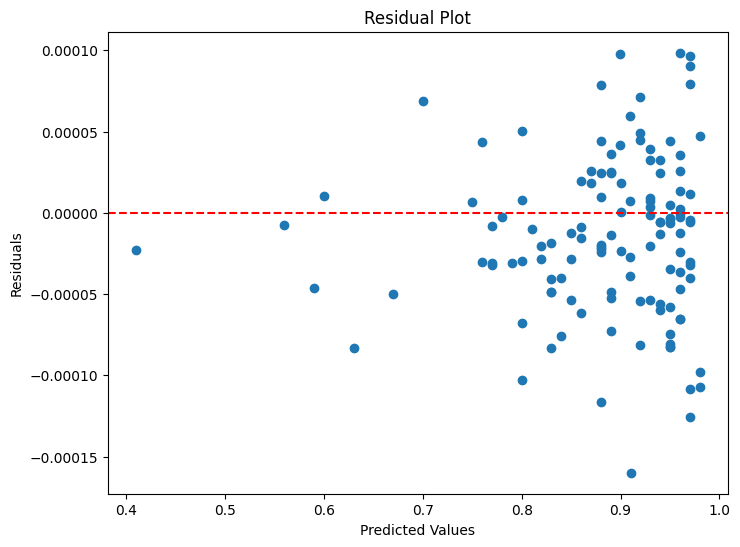

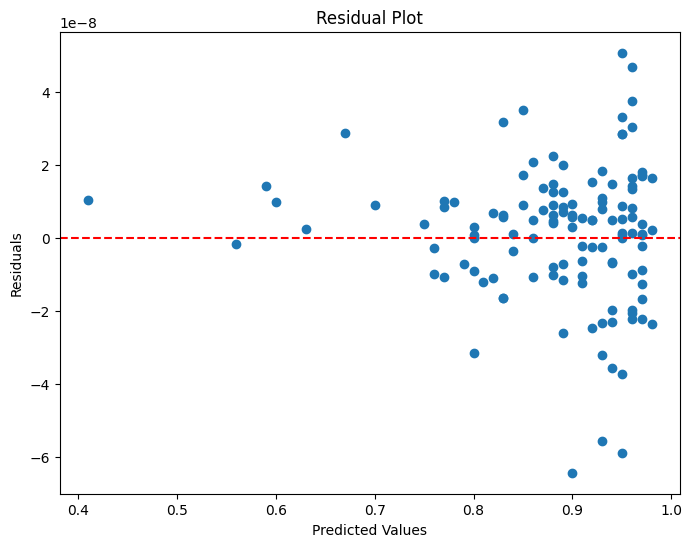

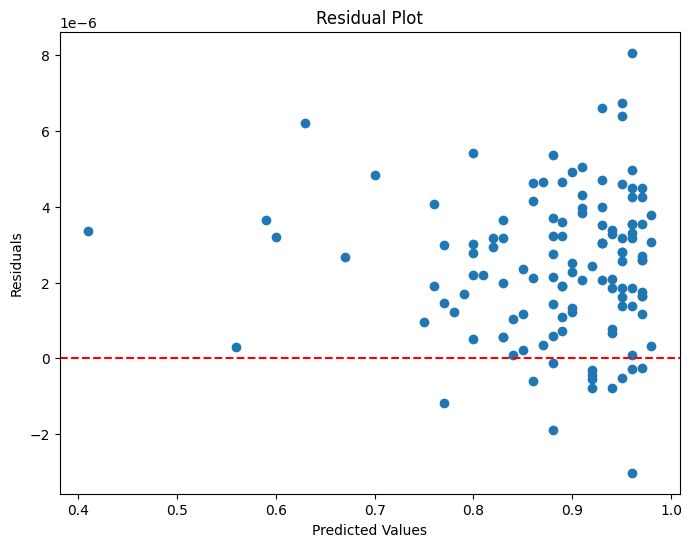

In [ ]:
residuals1 = y - y_pred1
residuals2 = y - y_pred2
residuals3 = y - y_pred3

plt.figure(figsize=(8, 6))
plt.scatter(y_pred1, residuals1)
plt.axhline(y=0, color='r', linestyle='--')  # 水平线表示零残差
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred2, residuals2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred3, residuals3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

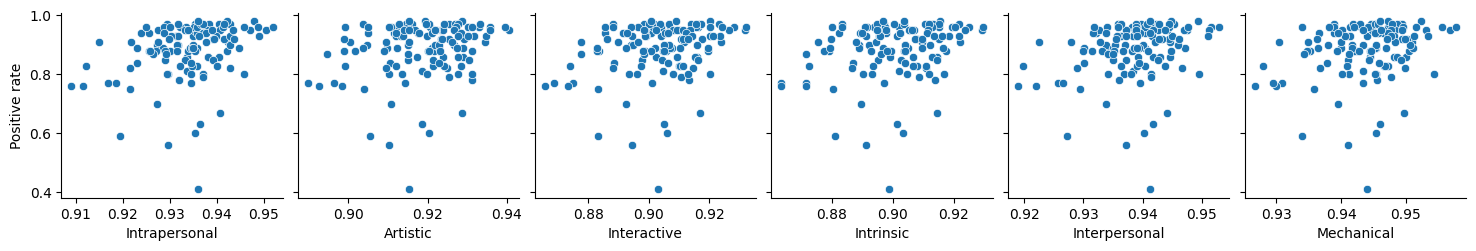

In [ ]:
import pandas as pd
import seaborn as sns

# Assuming 'data' is a list or array containing your data
# Specify the column names for your DataFrame
column_names = ['Intrapersonal', 'Artistic', 'Interactive', 'Intrinsic', 'Interpersonal', 'Mechanical', 'Positive rate']

# Create a DataFrame
df = pd.DataFrame(data, columns=column_names)

# Plotting the relationship between multiple features and the target variable
sns.pairplot(df, x_vars=['Intrapersonal', 'Artistic', 'Interactive', 'Intrinsic', 'Interpersonal', 'Mechanical'], y_vars='Positive rate', kind='scatter')
plt.show()

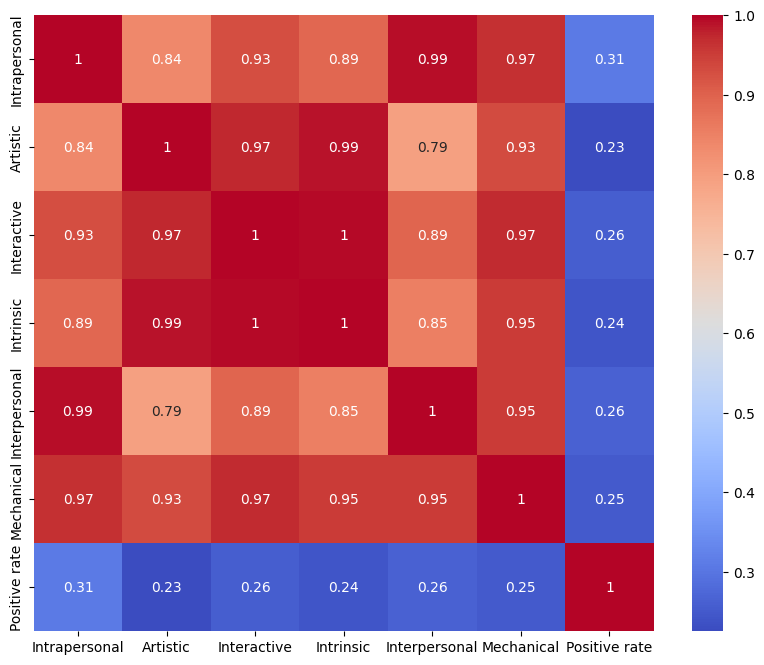

In [ ]:
# 计算特征之间的相关系数
correlation_matrix = df.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

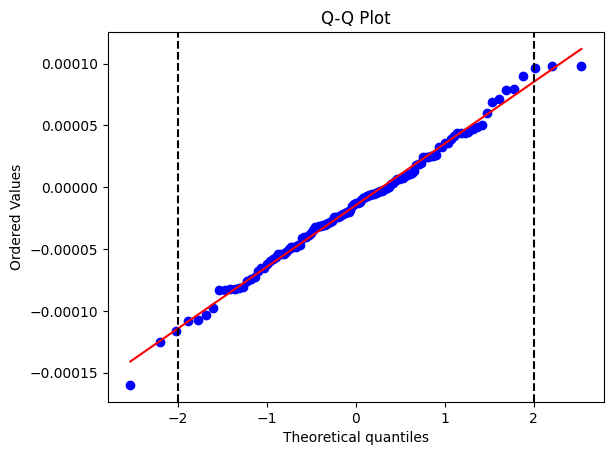

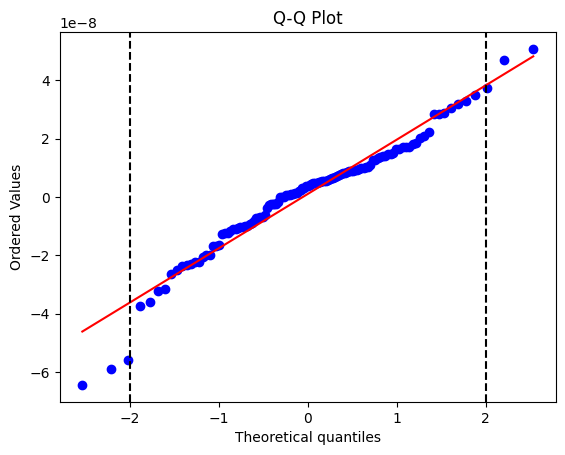

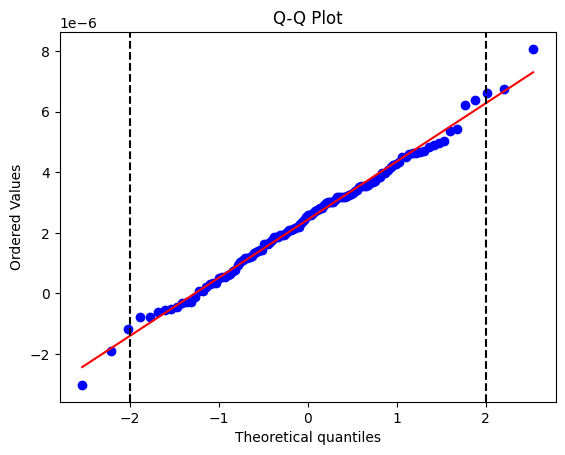

In [ ]:
import scipy.stats as stats
# 绘制 Q-Q 图
stats.probplot(residuals1, dist="norm", plot=plt)
plt.axvline(x = -2, color = "black", linestyle = "--")
plt.axvline(x = 2, color = "black", linestyle = "--")
plt.title('Q-Q Plot')
plt.show()

stats.probplot(residuals2, dist="norm", plot=plt)
plt.axvline(x = -2, color = "black", linestyle = "--")
plt.axvline(x = 2, color = "black", linestyle = "--")
plt.title('Q-Q Plot')
plt.show()

stats.probplot(residuals3, dist="norm", plot=plt)
plt.axvline(x = -2, color = "black", linestyle = "--")
plt.axvline(x = 2, color = "black", linestyle = "--")
plt.title('Q-Q Plot')
plt.show()